# Assigment

##### UNESCO-IHE, Hydrology, Module 3, Transient Groundwater Flow, Dec 2016-Jan 2017

##### Mail to: tolsthoorn@gmail.com,    use assigment IHE in the subject

##### Name of student: Peter Paul Silva 
####  Student number: 52389
#### Locker number: 141

# An aquifer storage and recovery system to reduce extraction from river during summer

## Problem statement

A water company extracts water from a small river to treat and distribute it as drinking water for the population of a small town nearby. This is not a problem in winter. However, due to growing demand for drinking water and growing environmental concern, extraction has become more and more problematic during summers when the discharge of this small river is at its lowest. The environmental agency has recently even forbidden to further extract water from the river during the summer months.

In order to solve the problem that this causes for the drinking water supply, the drinking water company has suggested an "Aquifer Storage and Recovery" system (these so-called ASR systems are becoming more and more popular). It wants to take in more river water during winter and inject it through a well (or wells) at some distance from the river into the local water-table aquifer, so that this water can be extracted during the next summer. This way, no water-intake will be necessary during the summer months.

However, the debate that took off between the water company and the environmental agency focuses on whether, or to what extent, this ASR system really makes sense. Can you really store the water in winter and extract it during summer without substantially affecting the already low summer-discharge of the river? Will not much of the stored water flow back to the river through the aquifer during winter? And would the extraction not induce an infiltration from the river into the aquifer during summer, so that there is still a water intake, the only differece now being that it will be invisible?

It's your task as hydrologist of the environmental agency to answer this question and illustrate it quantitatively and also explain it clearly. Your explanation should include why and how you derived your answer. It should show the math and the code.

It is obvious that ASR will work if the distance between the well and the river is large enough. But how large is large enough, and on what does it depend? The water company suggested a distance of 500 m from the river. Should the environmental agency agree?

#### Hints and further information:

1. To analyse this system, at least coarsely, simplify the injection and extraction regime and apply superposition. Superposition allows to only consider the well and treat the river as a fixed-head boundary using a mirror well. Simplify the river to a straight line along the y-axis and place the well at distance $x_w$ from this line at coordinate $(x_w, 0)$. That is, the x-axis is perpendicular to the river.

2. The drinking water demand, $Q$, is considered constant year-round at 150 L/d per inhabitant for the 10000 inhabitants of the town.

3. Assume the following injection and recovery regime:
    >+ The water company well extracts during 3 summer months (June, July, Aug) its full demand
    >+ It compensates that during 6 winter months (October-March) by injecting half its daily capacity.
    >+ There is neither injection nor extraction during the months April, May and September.

4. The idea is to analyse this ASR system by computing the exchange between the aquifer and the river due to the well.

5. When you have coded the problem for this particular distance of 500 m, experiment with this distance to come up with a distance that realy makes sense in terms of not inducing loss of river water during the summer months. That is, try 1000 and 2000 m.

6. Use kD = 900 m2/d, S = 0.2

## Steps to take:

1. Use Theis' well function to compute drawdowns:

    $$ s(t, t) =\frac  Q {4 \pi kD} W(u), \,\,\,\,\ W(u) =  -scipy.special.expi(-u),\,\,\,\,\, u \frac {r^2 S} {4 kD t} $$

1. From Theis' well function

    $$ W(u) = \intop_u^\infty \frac {e^{-y}} y dy $$

    derive the flow $Q(r, t)$ [L3/T] and the specific discharge $q(r,t)$ [L2/T] in the aquifer at distance $r$ from the well.

1. To simulate the river, apply a mirror well.

1. Compute the exchange between aquifer and river, derive the specific discharge $q$ [L2/T] perpendicular to the river at an arbitrary point $y$.

1. Compute this specific discharge for a large number of points between $-a x_w<y<a x_w$, where $a$ is sufficiently large, thus covering a large enough track of the river to capture about the full induced exchange between aquifer and the river.

    Generating appropriate y-coordinates this way, can be done as follows:

    `y = np.hstack(( -np.logspace(0, np.log10(a * xw), Np)[::-1], np.logspace(0, np.log10(a * xw), Np))`

    Where $a$ may be taken 10 and $Np$ 500 for example.

1. Numerically integrate this specific discharge along the river to obtain the total exchange between river and aquifer.    
    >Numerical integration is easy when uing the Simpson rule (trapezium rule).

1. Having the code to do this for a single time, it can readily be extended for a large number of times.
1. Check that for large times, the total flow between aquifer and river should be about the total discharge of the well if the well is continuously injecting.

1. Finally simulate the actual flow regime with 6 month injection and 3 months extraction as explained above. Simulate for a period of 5 years. This simulation requires superposition in time.

### Suggestions:

1. It's probably easiest to analyze everything in time units of months instead of days, 5 years time then runs from 0 to 60 months.
1. Learn to define and use functions in Python to keep overview and prevent repeating code.
2. If you consider this too complicated, then anlyse at least the situation for only the river point closest to the well.
3. Start by plotting the head.
4. When this works focus on the discharge.
1. Don't hesitate to ask questions and for help.


In [2]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from scipy.special import exp1 as W

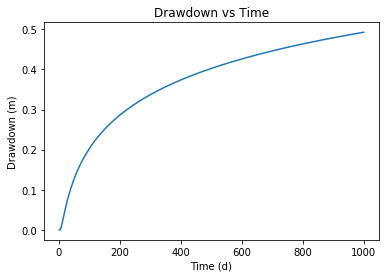

In [3]:
# Drawdown in the Well

Q = 1500 # m3/d
kD = 900 # m2/d
S = 0.2
xw = 500 # distance from river
yw = 0
xr = 0
yr = 0


times = np.logspace(0, 3, 100)
r = np.sqrt((xr - xw)**2 + (yr - yw)**2)
u = r ** 2 * S / (4 * kD * times)
s = Q/(4 * np.pi * kD) * W(u)


plt.plot(times, s)
plt.xlabel('Time (d)')
plt.ylabel('Drawdown (m)')
plt.title('Drawdown vs Time')
plt.show()



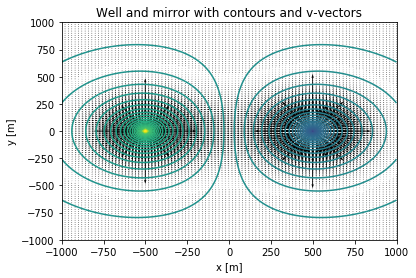

In [11]:
# Mirror Well

Qm = 45000 # m3/month
kD = 27000 # m2/month
S = 0.2

t = 1.0 # month

Nt = 31 # number of times
Nr = 20 # number of distances

times = np.logspace(-3, 2, Nt)
distances = np.logspace(0, 3, Nr)
u = distances.reshape((1, Nr)) ** 2 * S / (4 * kD * times.reshape((Nt, 1)))

s = Q / (4 * np.pi * kD) * W(u)

x = np.linspace(-1000, 1000, 101)
y = np.linspace(-1000, 1000, 101)
Nx = len(x)
Ny = len(y)
X = np.ones((len(y), 1)) * x[np.newaxis, :]
Y = y[:, np.newaxis] * np.ones((1, len(x)))

xw = [-500., 500]
yw = [  0., 0.]
rw = [0.25, 0.25]
Qw = [45000, -45000] # m3/month

s = np.zeros_like(X)
qr = np.zeros_like(X)
qx = np.zeros_like(X)
qy = np.zeros_like(X)

for x0, y0, r0, Q0 in zip(xw, yw, rw, Qw):
    r = np.sqrt((X - x0)**2 + (Y - y0)**2)
    r[r==0] = r0
    u = r**2 * S / (4 * kD * t)
    s += Q0 / (4 * np.pi * kD) * W(u)
    q = Q0 * np.exp(-u) / (2 * np.pi * r)
    qr += q
    qx += q * (x0 - X) / r
    qy += q * (y0 - Y) / r
    
xlim=(-1000, 1000)
ylim=(-1000, 1000)

fig, ax = plt.subplots()

ax.contour(x, y, s, np.linspace(np.min(s), np.max(s), 100))
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('Well and mirror with contours and v-vectors')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.quiver(X, Y, qx, qy)
plt.show()

# plt.plot(x, s)
# plt.show()


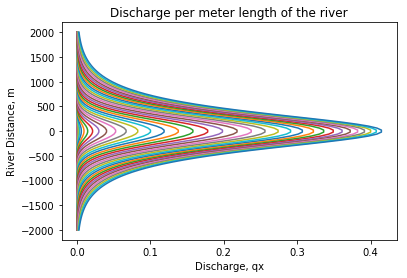

447.0501601404157


In [5]:
# Discharge

Q = 1500 # m3/d
kD = 900 # m2/d
S = 0.2
xw = 500 # distance from river
yw = 0
xr = 0
yr = np.linspace(-2000, 2000, 100)

r = np.sqrt((xr - xw)**2 + (yr - yw)**2)
times = np.logspace(0, 2, 41)


for t in times:
    
    u = r ** 2 * S / (4 * kD * t)
    s = Q/(4 * np.pi * kD) * W(u)

    Qr = Q * np.exp(-u) # Discharge from the aquifer to the well
    qr = Qr / (2 * np.pi * r) # specific discharge from the aquifer to the well
    qx = qr * (xw - xr) / r # x-component of the flow    
    
    plt.plot(qx, yr)
    plt.xlabel('Discharge, qx')
    plt.ylabel('River Distance, m')
    plt.title('Discharge per meter length of the river')    
plt.show()  

dy = yr[1:] - yr[:-1]
dy = np.diff(yr)
qrivc = 0.5 * (qx[:-1] + qx[1:])
Qriv = np.sum(qrivc * dy)

print(Qriv)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1 as W

In [6]:
kD = 900.
S = 0.2
Q = 0.15 * 10000

L = 1500.
xw = -L
yw = 0.
a = 25


In [7]:
Y = np.hstack((-np.logspace(0, np.log10(a * L))[::-1], np.logspace(0, np.log10(a * L))))
X = np.zeros_like(Y)
R = np.sqrt((X - xw)**2 + (Y - yw)**2)
times = np.logspace(0, 4, 21)

for t in times:
        u = (R**2 * S) / (4 * kD * t)
        s = Q/(4 * np.pi * kD)*W(u)
        plt.plot(Y, s, label="t={:4g}".format(t))
plt.title('Drawdown of the well along the river without the mirror well')
plt.xlabel('y [m]')
plt.ylabel('s [m]')
# plt.legend(loc='best', fontsize='x-small')
# plt.show()


In [8]:
Q0 = Q


def qx(Q0, t):
    u = R**2 * S / (4 * kD * t)
    return Q0 / np.pi * np.abs((xw - X) / R**2) * np.exp(-u)

# using the abs, we dont have to worry about the sign xw - xriv
for t in times:
    plt.plot(Y, qx(Q0, t), label="t={:g}".format(t))
    plt.legend(loc='best', fontsize='x-small')
plt.title('Inflow vs y')
plt.xlabel('y [m]')
plt.ylabel('Inflow q [m2/s]')
# plt.show()


In [9]:
def Qriv(Q0, t):
    dy = np.diff(Y)
    q = qx(Q0, t)
    return np.sum(0.5 * dy * (q[:-1] + q[1:]))

In [10]:
Qtot = np.zeros_like(times)
for i, t in enumerate(times):
    Qtot[i] = Qriv(Q0, t)


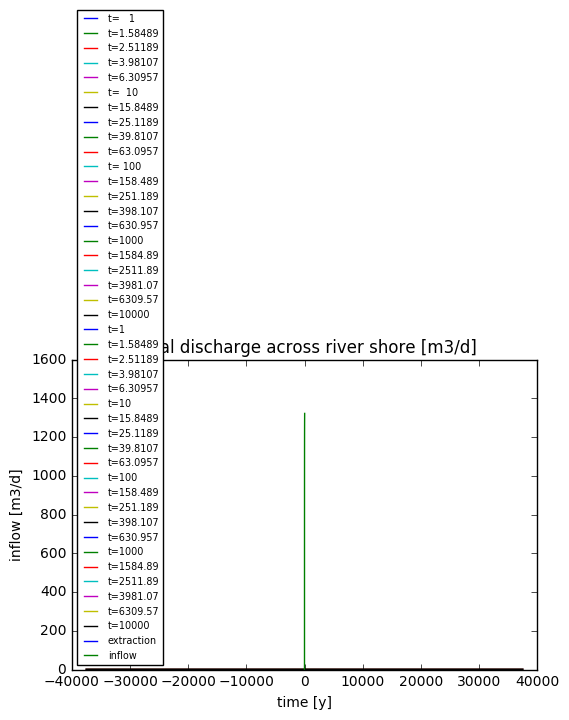

In [11]:
#def Qriv(Q0, t):
    # dy = np.diff(Y)
    # q = qx(Q0, t)
    # return np.sum(0.5 * (q[:-1] * dy + q[1:] * dy))
# plt.plot(times/365.25, [Qriv(Q0, t) for t in times], label='from rive into aquifer')
plt.plot(times/365.25, Q0 * np.ones_like(times), label='extraction')
plt.plot(times/365.25, Qtot, label='inflow')
# plt.plot(times/365.25, Q0 * np.ones_like(times), label='extraction')

plt.title('Total discharge across river shore [m3/d]')
plt.xlabel('time [y]')
plt.ylabel('inflow [m3/d]')
plt.legend(loc='best', fontsize='x-small')
plt.show()

In [12]:
#          JAN   FEB   MAR  APR MAY JUNE JUL AUG SEP OCT NOV DEC
regime = [-0.5, -0.5, -0.5, 0, 0, 1, 1, 1, 0, -0.5, -0.5, -0.5]
Qregime = [Q * f for f in regime] * 5
# print(Qregime)

In [13]:
months = np.arange(len(Qregime)) 
tMonths = 30.5 * months # times at month begin
tsim = np.arange(tMonths[-1]) # tsim [d]
# print(tsim)
# print(len(tsim))
# print(months)
# print(tMonths)

In [14]:
Qdiff = np.hstack((np.array([Qregime[0]]), np.diff(np.array(Qregime))))
# change in extraction at the end of each month (need this for superposition)

In [15]:
QRIV = np.zeros_like(tsim) # exchange with river
QEXT = np.zeros_like(tsim) # extraction by well
for tm, dQ in zip(tMonths, Qdiff):
    for i, ts in enumerate(tsim):
        if ts > tm:
            QRIV[i] += Qriv(dQ, ts - tm)
            QEXT[i] += dQ

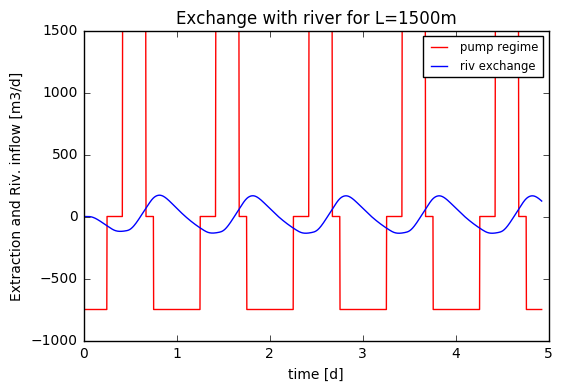

In [16]:
plt.plot(tsim/365.25, QEXT, 'r', label='pump regime')
plt.plot(tsim/365.25, QRIV, 'b', label='riv exchange')
plt.title('Exchange with river for L={:g}m'.format(L))
plt.xlabel('time [d]')
plt.ylabel('Extraction and Riv. inflow [m3/d]')
plt.legend(loc='best', fontsize='small')
plt.show()